In [1]:
# %pylab

In [2]:
import pandas_datareader.data as web

import matplotlib.pyplot as plt
import pandas as pd

/Volumes/MEDIA/ohm/anaconda3/envs/pythonomy/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


symbol = 'WIKI/AAPL'
df = web.DataReader(symbol, 'quandl', '2015-01-01', '2015-01-05')



In [3]:
start_date = '2015-07-06'
end_date = '2020-07-01'

tickers = ['AAPL', 'MSFT', 'TSLA', 'XLNX']
panel_data = web.DataReader(name=tickers, 
                             data_source='stooq', 
                             start=start_date, 
                             end=end_date)

In [4]:
type(panel_data)

pandas.core.frame.DataFrame

In [5]:
panel_data.head()

Attributes   Close                              High                   \
Symbols       AAPL    MSFT     TSLA   XLNX      AAPL    MSFT     TSLA   
Date                                                                    
2020-07-01  364.01  204.70  1119.63  93.27  367.3600  206.35  1135.33   
2020-06-30  364.80  203.51  1079.81  98.39  365.9800  204.40  1087.69   
2020-06-29  361.78  198.44  1009.35  91.96  362.1736  198.53  1010.00   
2020-06-26  353.63  196.33   959.74  91.02  365.3200  199.89   995.00   
2020-06-25  364.84  200.34   985.98  93.29  365.0000  200.61   985.98   

Attributes              Low                                  Open            \
Symbols        XLNX    AAPL      MSFT       TSLA     XLNX    AAPL      MSFT   
Date                                                                          
2020-07-01  98.4000  363.91  201.7700  1080.5000  93.1800  365.12  203.1400   
2020-06-30  99.3999  360.00  197.7400  1003.7300  94.2100  360.08  197.8816   
2020-06-29  92.0000  351.28  193.5500   948.5201  90.7100  353.25  195.7800   
2020-06-26  92.5800  353.02  194.8800   954.8700  90.4061  364.41  199.7300   
2020-06-25  93.5500  357.57  195.4675   937.1500  91.0000  360.70  197.8000   

Attributes                    Volume                               
Symbols        TSLA   XLNX      AAPL      MSFT      TSLA     XLNX  
Date                                                               
2020-07-01  1083.00  98.09  27635351  32031722  13193927  4047680  
2020-06-30  1006.50  95.68  35055821  34310283  16918501  9279488  
2020-06-29   969.01  91.30  32661519  26701586   9026404  2264371  
2020-06-26   994.78  91.93  51314211  54675780   8854908  3279064  
2020-06-25   954.27  92.65  34380628  27803933   9254549  2178478

In [6]:
close = panel_data['Close']
high = panel_data['High']
low = panel_data['Low']

In [7]:
med = (high+low)/2

In [8]:
med.head()

Symbols,AAPL,MSFT,TSLA,XLNX
Date,,,,
2020-07-01,365.6350,204.06000,1107.91500,95.79000
2020-06-30,362.9900,201.07000,1045.71000,96.80495
2020-06-29,356.7268,196.04000,979.26005,91.35500
2020-06-26,359.1700,197.38500,974.93500,91.49305
2020-06-25,361.2850,198.03875,961.56500,92.27500


In [9]:
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')


In [10]:
# close = close.reindex(all_weekdays)
med = med.reindex(all_weekdays)

In [11]:
# close = close.fillna(method='ffill')

In [12]:
print(all_weekdays)

DatetimeIndex(['2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
               '2015-07-10', '2015-07-13', '2015-07-14', '2015-07-15',
               '2015-07-16', '2015-07-17',
               ...
               '2020-06-18', '2020-06-19', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=1303, freq='B')


In [13]:
med.head(15)

Symbols,AAPL,MSFT,TSLA,XLNX
2015-07-06,115.700,40.0165,278.995,39.1270
2015-07-07,115.160,39.7350,267.985,38.8460
2015-07-08,113.900,40.2420,257.555,38.6565
2015-07-09,112.095,40.5990,259.870,38.3660
2015-07-10,112.915,40.5950,260.410,37.9595
2015-07-13,115.230,40.9860,259.300,38.0225
2015-07-14,115.850,41.3010,263.250,38.3865
2015-07-15,116.460,41.3210,264.785,38.3940
2015-07-16,117.930,41.9300,265.180,38.3055
2015-07-17,118.860,42.1000,271.895,38.1490


In [14]:
med.describe()

Symbols,AAPL,MSFT,TSLA,XLNX
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,167.384933,91.111741,318.705984,69.879898
std,63.772999,41.155806,154.239203,23.925861
min,85.428500,37.818500,148.355000,35.887500
25%,109.443750,53.998125,228.697500,49.177125
50%,160.270000,82.955750,283.365000,66.076000
75%,200.892500,117.161250,338.977500,87.608250
max,367.325050,204.060000,1107.915000,136.545000


In [15]:
msft = med.loc[:, 'MSFT']
tsla = med.loc[:, 'TSLA']

In [16]:
# Calculate 20,50,&100 days moving averages of the median prices
short_rolling_msft = msft.rolling(window=20).mean()
med_rolling_msft = msft.rolling(window=50).mean()
long_rolling_msft = msft.rolling(window=100).mean()

In [17]:
# Calculate 20,50,&100 days moving averages of the median prices
short_rolling_tsla = tsla.rolling(window=20).mean()
med_rolling_tsla = tsla.rolling(window=50).mean()
long_rolling_tsla = tsla.rolling(window=100).mean()

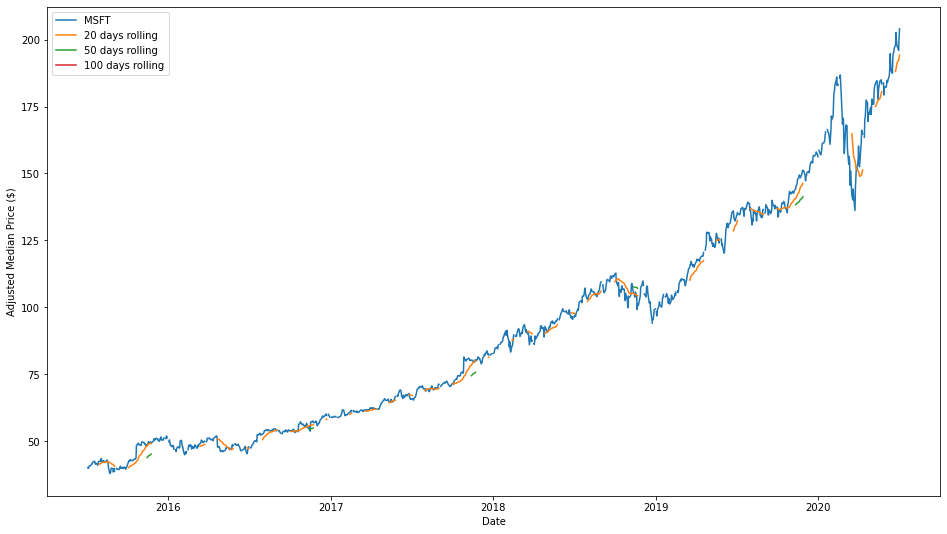

In [18]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(short_rolling_msft.index, med_rolling_msft, label='50 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Median Price ($)')
ax.legend()

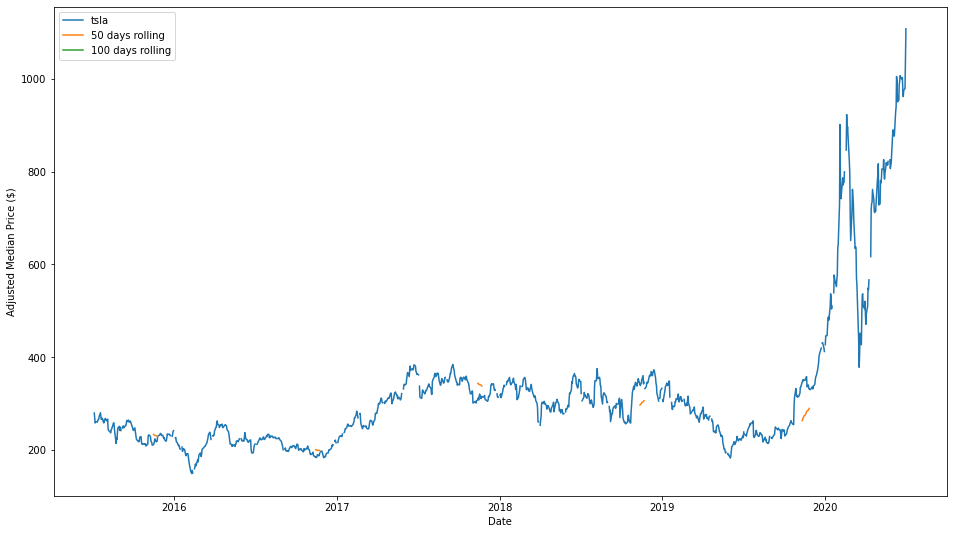

In [19]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(tsla.index, tsla, label='tsla')
# ax.plot(short_rolling_tsla.index, short_rolling_tsla, label='20 days rolling')
ax.plot(short_rolling_tsla.index, med_rolling_tsla, label='50 days rolling')
ax.plot(long_rolling_tsla.index, long_rolling_tsla, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Median Price ($)')

ax.legend()